<a href="https://colab.research.google.com/github/matthewlai12/ECE-Lab/blob/main/ECE447A2MatthewLai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ECE 447: Data Analysis and Machine Learning for Engineers**

# Assignment A2
**Decision Trees and Logistic Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.simplefilter("ignore")

Your task is to build several decision tree-based systems to predict **class** if an individual is **E** or **P** (the first column in the data).

You have to identify a single model that provides the best performance.

# Data Exploration

In the beginning, you should perform data exploration. Steps:

1.   load data and 'take a look' at it (done below)
2.   analyze it (display, visualize)
3.   learn more about attributes/features (correlation/heatmap)


In [2]:
data=pd.read_csv('mushrooms_new.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,p,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,p,b,s,w,t,a,f,c,n,g,...,s,w,w,p,w,o,p,k,n,m


In [3]:
from sklearn.preprocessing import LabelEncoder

Encoder_Data = LabelEncoder()
for col in data.columns:
    data[col] = Encoder_Data.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
3,1,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
4,1,0,2,8,1,0,1,0,1,2,...,2,7,7,0,2,1,4,2,2,3


Calculate correlation and display heatmap

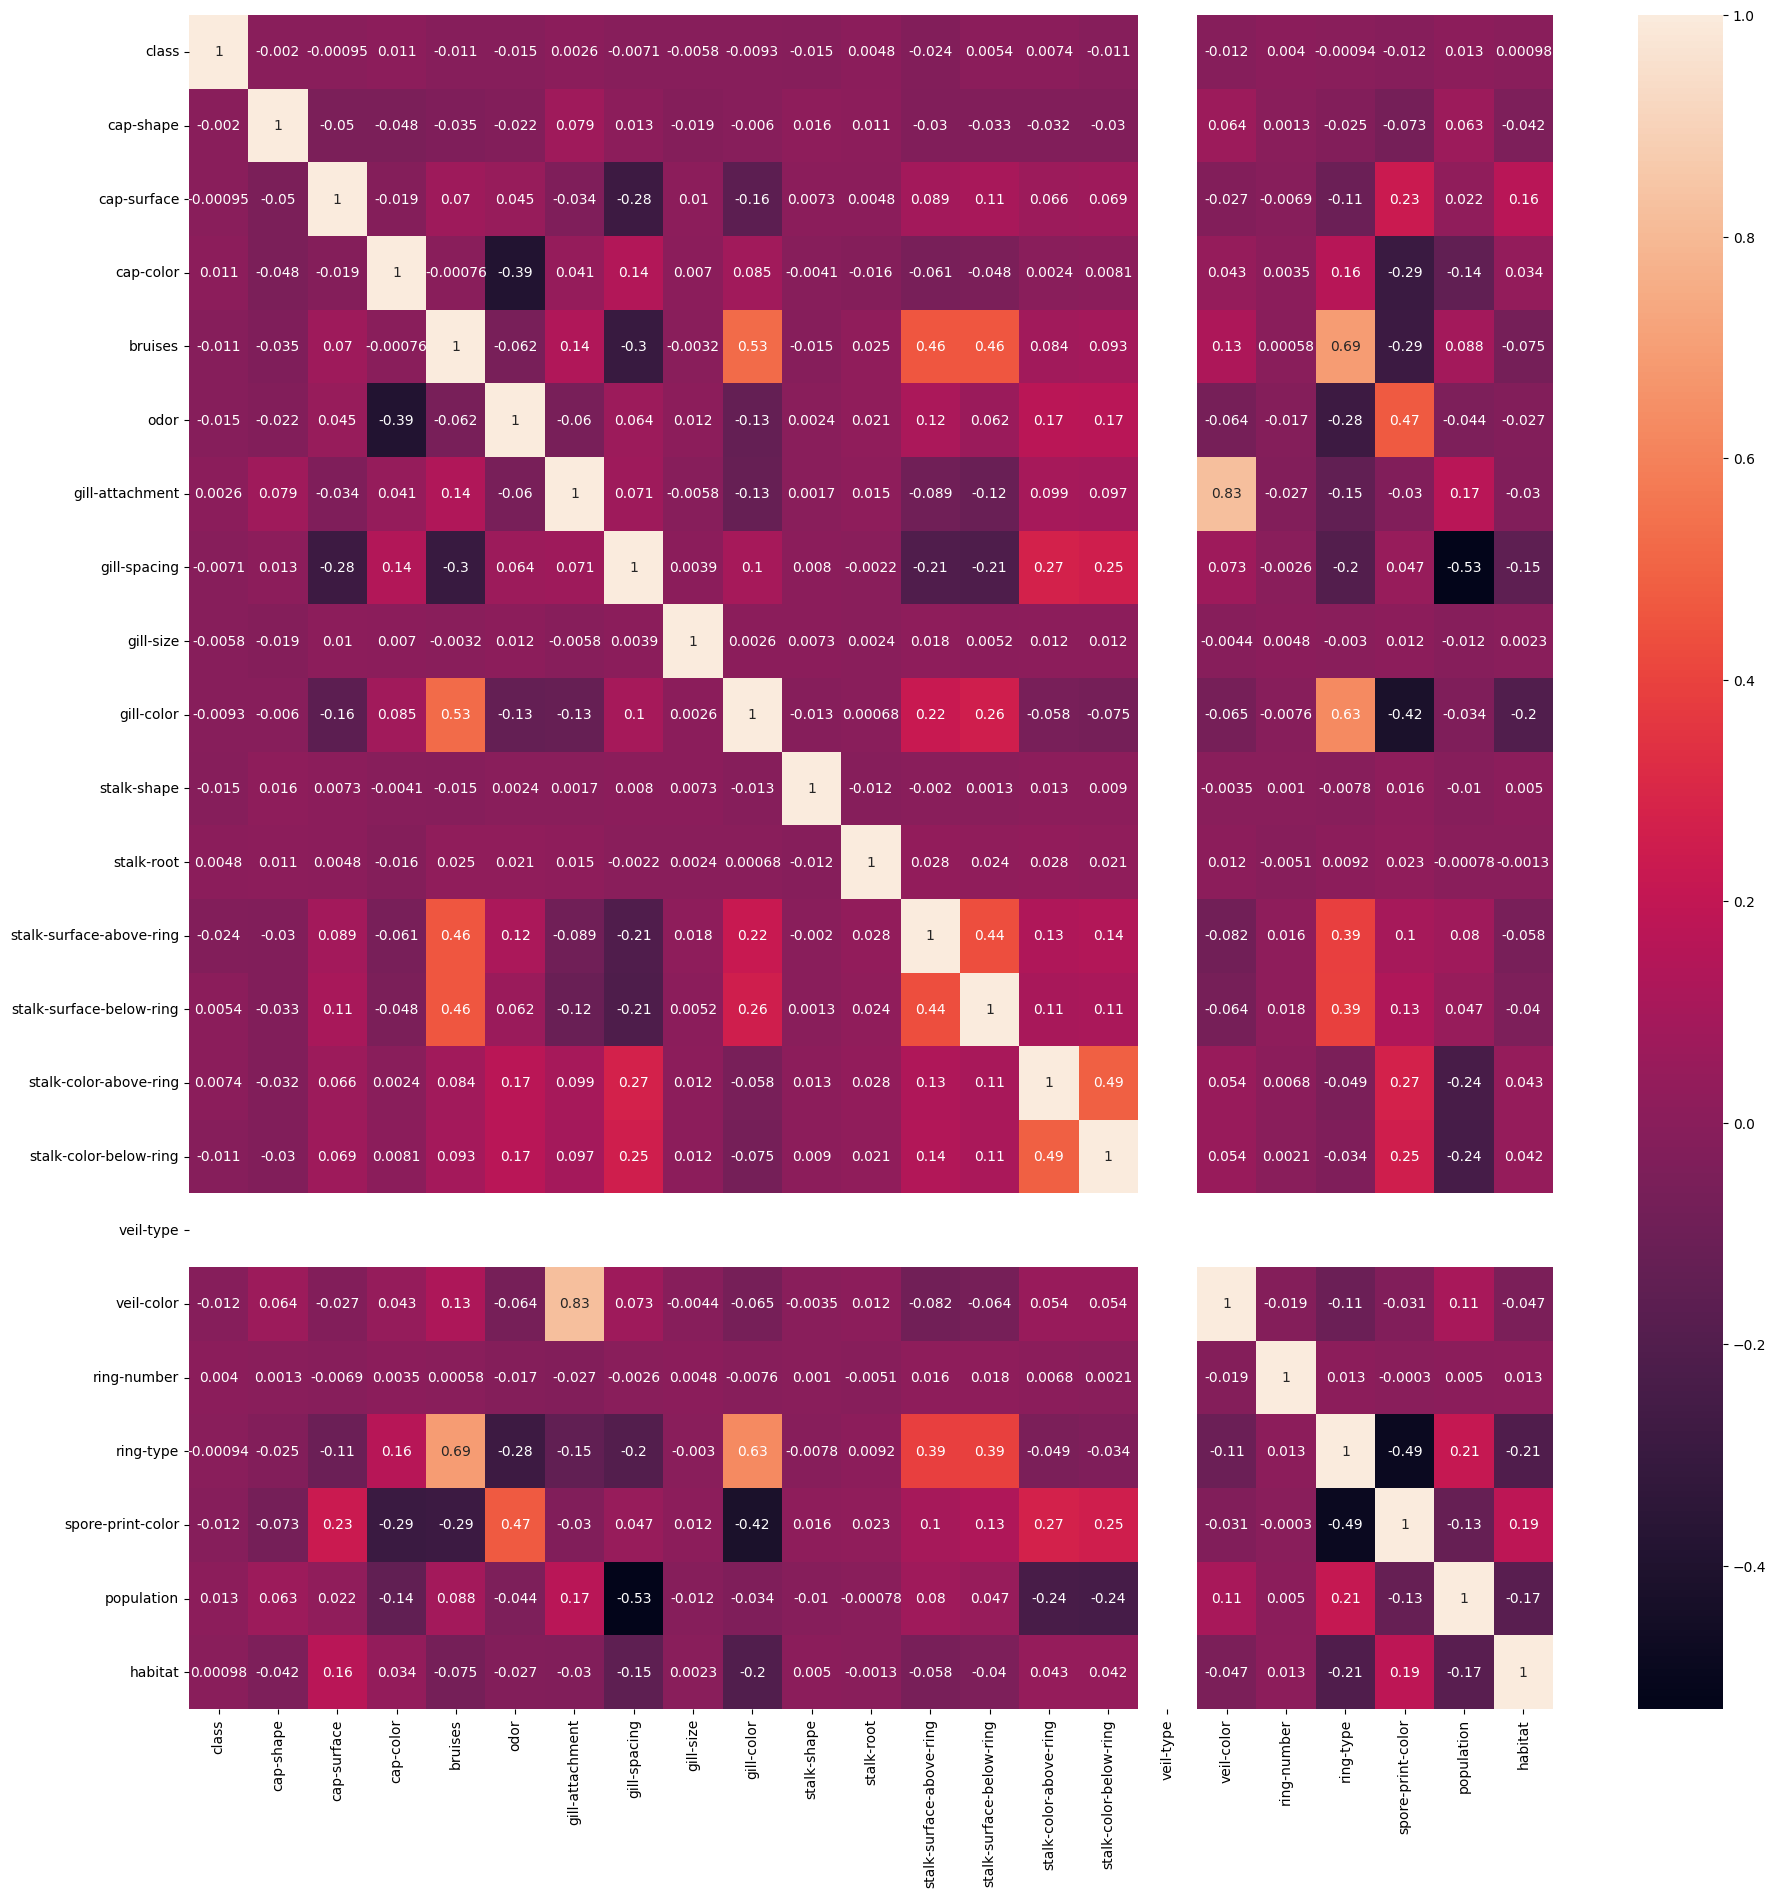

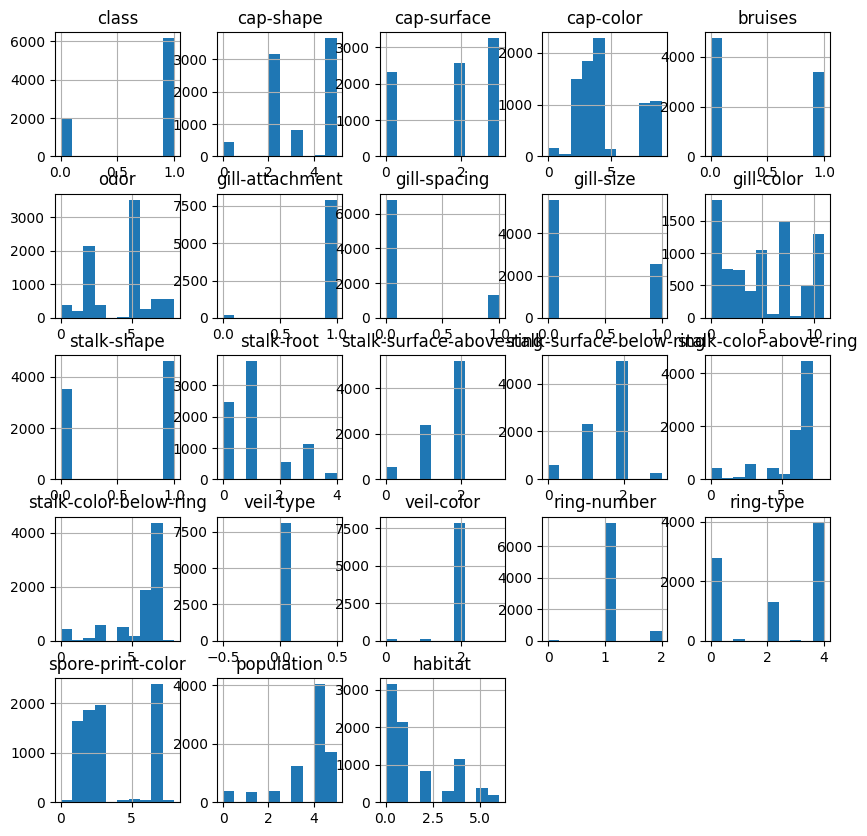

In [4]:
# Find correlation between all the variables using a heatmap
corr = data.corr()
plt.subplots(figsize=(22,22))
sns.heatmap(corr, annot=True)

# Create a histogram for all columns to try and detect any anomalies
hist = data.hist(figsize=[10,10])

## Reading Data

In [5]:
df=pd.read_csv('mushrooms_new.csv')

In [6]:
#To see the first five rows of the dataset we can use dataset.head()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,p,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,p,b,s,w,t,a,f,c,n,g,...,s,w,w,p,w,o,p,k,n,m


In [7]:
print("Data shape:")
print(df.shape)
print("Data info:")
print(df.info())

Data shape:
(8124, 23)
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   ob

## Data Exploration/Visualization

Use the space below to insert your code for data exploration ... for example, correlation between all variables, histogram, and so on ...

In [8]:
df.describe().T

,count,unique,top,freq
class,8124,2,p,6168
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5588
gill-color,8124,12,b,1728


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Class

In [10]:
df['class'] = df['class'].apply(lambda x:'Edible' if 'e' in x else 'Poisonous')

[Text(0, 0, '1956'), Text(0, 0, '6168')]

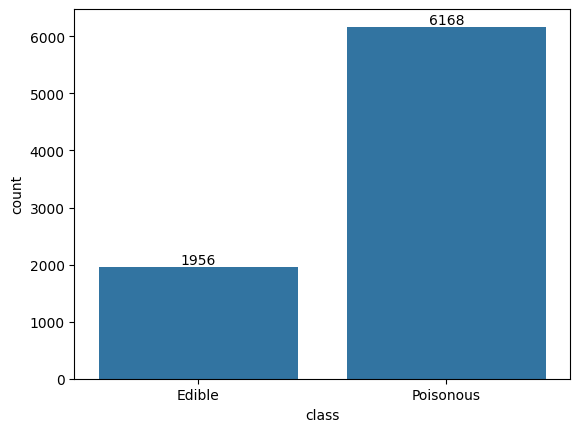

In [11]:
ax = sns.countplot(x=df['class'])
ax.bar_label(ax.containers[0])

### Cap Shape

[Text(0, 0, '3656'),
 Text(0, 0, '452'),
 Text(0, 0, '32'),
 Text(0, 0, '3152'),
 Text(0, 0, '828'),
 Text(0, 0, '4')]

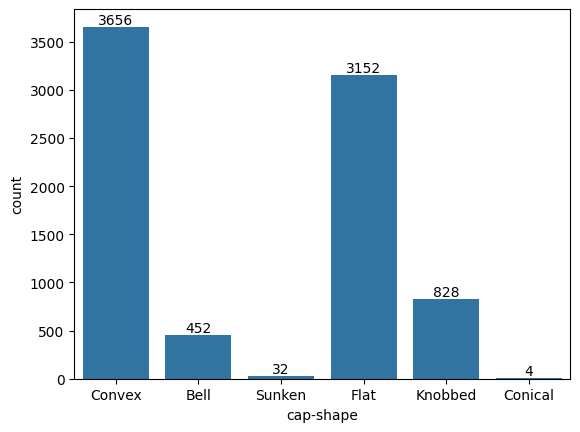

In [12]:
df['cap-shape'] = df['cap-shape'].apply(lambda x:'Bell' if 'b' in x else 'Convex' if 'x' in x else 'Flat' if 'f' in x else 'Knobbed' if 'k' in x else 'Sunken' if 's' in x else 'Conical')
ax = sns.countplot(x=df['cap-shape'])
ax.bar_label(ax.containers[0])

### Cap Surface

[Text(0, 0, '2556'), Text(0, 0, '3244'), Text(0, 0, '2320'), Text(0, 0, '4')]

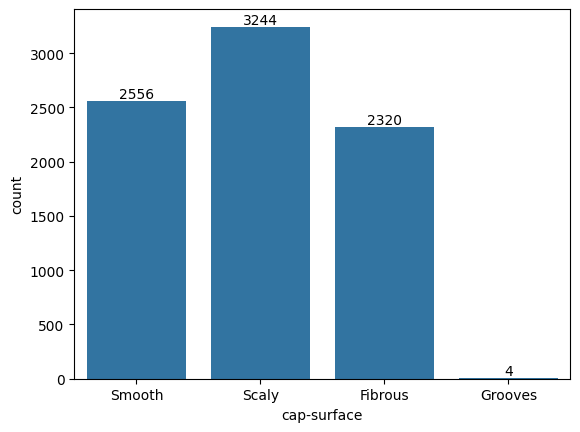

In [13]:
df['cap-surface'] = df['cap-surface'].apply(lambda x:'Fibrous' if 'f' in x else 'Grooves' if 'g' in x else 'Scaly'  if 'y' in x else 'Smooth')
ax = sns.countplot(x=df['cap-surface'])
ax.bar_label(ax.containers[0])

### Cap Color

[Text(0, 0, '1072'),
 Text(0, 0, '1040'),
 Text(0, 0, '1840'),
 Text(0, 0, '2284'),
 Text(0, 0, '1500'),
 Text(0, 0, '168'),
 Text(0, 0, '16'),
 Text(0, 0, '44'),
 Text(0, 0, '144'),
 Text(0, 0, '16')]

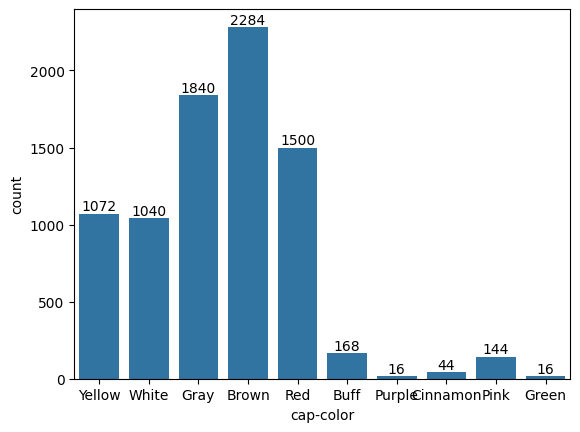

In [14]:
df['cap-color'] = df['cap-color'].apply(lambda x:'Brown' if 'n' in x else 'Buff' if 'b' in x else 'Cinnamon' if 'c' in x else 'Gray' if 'g' in x
                                        else 'Green' if 'r' in x else 'Pink' if 'p' in x else 'Purple' if 'u' in x else 'Red' if 'e' in x
                                        else 'White' if 'w' in x else 'Yellow' if 'y' in x else 'Unknown')
ax = sns.countplot(x=df['cap-color'])
ax.bar_label(ax.containers[0])

### Bruises

[Text(0, 0, '3376'), Text(0, 0, '4748')]

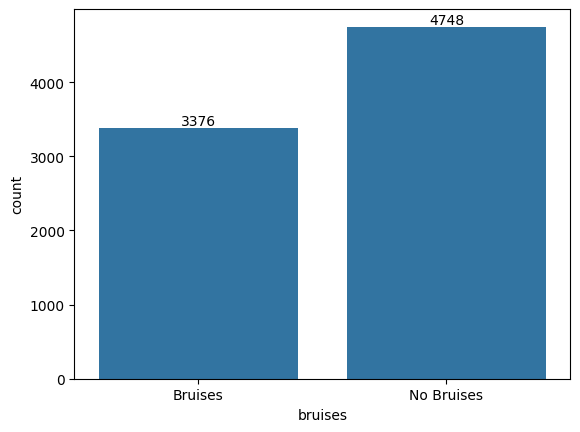

In [15]:
df['bruises'] = df['bruises'].apply(lambda x:'Bruises' if 't' in x else 'No Bruises')
ax = sns.countplot(x=df['bruises'])
ax.bar_label(ax.containers[0])

### Odor

[Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '3528'),
 Text(0, 0, '256'),
 Text(0, 0, '192'),
 Text(0, 0, '2160'),
 Text(0, 0, '576'),
 Text(0, 0, '576'),
 Text(0, 0, '36')]

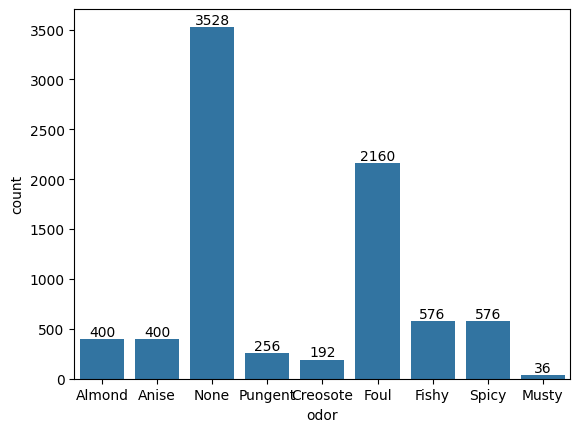

In [16]:
df['odor'] = df['odor'].apply(lambda x:'Almond' if 'a' in x else 'Anise' if 'l' in x else 'Creosote' if 'c' in x else 'Fishy' if 'y' in x
                                        else 'Foul' if 'f' in x else 'Musty' if 'm' in x else 'Pungent' if 'p' in x else 'Spicy' if 's' in x else 'None' if 'n' in x else 'Unknown')
ax = sns.countplot(x=df['odor'])
ax.bar_label(ax.containers[0])

## Data-Preprocessing

Label encoding is ideal for **ordinal categorical** data that exhibit a natural sequence or ranking. For instance, educational qualifications such as "High School," "Bachelor's," "Master's," and "Ph.D." can be numerically represented as 0, 1, 2, and 3, respectively.

Conversely, for **nominal categorical data without an inherent order**, one-hot encoding tends to be the preferred method. This approach transforms each category into a separate binary column, with each instance marked by **1** in its respective column and **0s** in all others.

Using label encoding on nominal data could erroneously suggest to models an order among categories that does not exist, potentially skewing outcomes.
One-hot encoding, however, can greatly expand your dataset's dimensionality, risking the curse of dimensionality with numerous unique categories. In such scenarios, applying feature selection or dimensionality reduction methods becomes necessary.

Hence, for the training data, we will employ one-hot encoding or dummy labels, while label encoding will be reserved for the target/output.

In [17]:
y = df['class']
X = df.drop(labels =['class'],axis=1)

In [18]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Convex,Smooth,Yellow,Bruises,Almond,f,c,b,k,t,...,s,w,w,p,w,o,p,n,n,g
1,Bell,Smooth,White,Bruises,Anise,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,Convex,Smooth,Gray,No Bruises,None,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
3,Convex,Scaly,Yellow,Bruises,Almond,f,c,b,n,t,...,s,w,w,p,w,o,p,k,n,g
4,Bell,Smooth,White,Bruises,Almond,f,c,n,g,e,...,s,w,w,p,w,o,p,k,n,m


In [19]:
X = pd.get_dummies(X)
X.head()

,cap-shape_Bell,cap-shape_Conical,cap-shape_Convex,cap-shape_Flat,cap-shape_Knobbed,cap-shape_Sunken,cap-surface_Fibrous,cap-surface_Grooves,cap-surface_Scaly,cap-surface_Smooth,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Decision Tree

1. Use *train_test_split()* to split the dataset into a training set and a test set (use the same split for all models).

2. 'Play around' with values of hyperparameters, and measure your model’s performance on the test set. You should obtain roughly 60% - 75% accuracy.

## Training with Gini index



1.   How would you define Gini index?
2.   How does the Gini Index contribute to feature selection in machine learning models?

Put your short answers below, and then train a model


### Answers

1. The Gini index is a metric to gauge the purity of a datset. It measures the probability of a specific feature being mislabeled when selected at random. If all features are a part of one class, then the dataset would be pure and the Gini index would be 0, but a higher value would indicate more mixed classes.

2. The Gini index contributes to feature selection in multiple ways. The first being the way it is able to select the best split based on a weighted Gini index. It will select the least weighted index and select that split as the most pure node. It is also able to effectively identify important features. It does so by checking if a feature consistently delivers minimal impurity. This means that the feature likely captures good patterns within the data, so it may be important to use.

### Training

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_gini, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Score: 0.757474654263911
Test Set Accuracy: 0.756357670221493


## Training with Entropy



1.  What is entropy in machine learning?
2.  How does entropy compare to Gini impurity?

Put your short answers below, and then train a model


### Answers

1. Entropy in machine learning is also a measure of impurity within a dataset. Its formula for calculation is logarithmic, and helps to determine how mixed classes are within a node. If all samples belong to one class, then it has a score of 0 and is considered no disorder. There is maximum disorder when the classes are equally balanced.

2. Both entropy and Gini impurity are measures of how pure or disordered a class is. However, entropy is logarithmic based, which allows it to be more sensitive to changes, while the Gini index focuses on the probability of misclassifications without logarithms. Gini is also more simple to compute, and takes less processing power so often it is chosen over entropy.

### Training

In [22]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_entropy, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.758705810159316
Test Set Accuracy: 0.7579983593109105


# Ensamble Models



1.   What are the main advantages of Random Forest?
2.   How does Random Forest perform feature selection?

Put your short answers below, and then train a model



## Answers

1. The main advantages of Random Forest is that it improves accuracy by combining multiple decision trees to reduce variance and improve predictive accuracy. Other advantages is that it is resisitant to overfitting by averaging the results of several trees. It handles large datasets well by using random subsets of features for each tree, which helps to reduce redundancy.

2. Each tree is built on a random subset of features which emphasises the most valueable feature sets naturally as it considers different features at each split. After training, it has an importance score that measures impurity and how impactful each feature set is. This allows each feature set to be accurately conveyed in how impactful it is in the final result, which we can then prioritize these features.

## Training

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)    # Ensemble Model (Random Forest)

param_grid = {
    'n_estimators': [50, 100, 150],   # Number of trees in the forest
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]    # Whether bootstrap samples are used
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", accuracy)

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.7594091069984991
Test Set Accuracy: 0.7592288761279737


# Performance comparison

Perform comparison of the obtained models, i.e., perform 10-fold cross validation with *cross_val_score()*, and T-test.

## Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

cv = 10

gini_scores = cross_val_score(dt_gini, X, y, cv=cv, scoring='accuracy')
entropy_scores = cross_val_score(dt_entropy, X, y, cv=cv, scoring='accuracy')
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

print("Decision Tree (Gini) Cross-Validation Scores:", gini_scores)
print("Mean Score (Gini)", gini_scores.mean())
print("Decision Tree (Entropy) Cross-Validation Scores:", entropy_scores)
print("Mean Score (Entropy)", entropy_scores.mean())
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Score (Random Forest)", rf_scores.mean())

Decision Tree (Gini) Cross-Validation Scores: [0.63591636 0.60762608 0.60270603 0.5904059  0.59852217 0.63793103
 0.49630542 0.63916256 0.61945813 0.63423645]
Mean Score (Gini) 0.6062270130090464
Decision Tree (Entropy) Cross-Validation Scores: [0.63837638 0.62484625 0.600246   0.5904059  0.58990148 0.59852217
 0.47783251 0.6453202  0.60221675 0.64285714]
Mean Score (Entropy) 0.6010524785050806
Random Forest Cross-Validation Scores: [0.75276753 0.74538745 0.73431734 0.73185732 0.70320197 0.74384236
 0.57019704 0.74876847 0.74507389 0.74753695]
Mean Score (Random Forest) 0.7222950332951605


## T-test

In [30]:
from scipy.stats import ttest_rel

t_statistic_gini_entropy, p_value_gini_entropy = ttest_rel(gini_scores, entropy_scores)
t_statistic_gini_rf, p_value_gini_fr = ttest_rel(gini_scores, rf_scores)
t_statistic_entropy_rf, p_value_entropy_rf = ttest_rel(entropy_scores, rf_scores)

print("T-statistic (Decision Tree (Gini) vs Decision Tree (Entropy)):", t_statistic_gini_entropy)
print("P-value (Decision Tree (Gini) vs Decision Tree (Entropy)):", p_value_gini_entropy)
print("T-statistic (Decision Tree (Gini) vs Random Forest):", t_statistic_gini_rf)
print("P-value (Decision Tree (Gini) vs Random Forest):", p_value_gini_fr)
print("T-statistic (Decision Tree (Entropy) vs Random Forest):", t_statistic_entropy_rf)
print("P-value (Decision Tree (Entropy) vs Random Forest):", p_value_entropy_rf)

T-statistic (Decision Tree (Gini) vs Decision Tree (Entropy)): 0.9981010659985935
P-value (Decision Tree (Gini) vs Decision Tree (Entropy)): 0.3443074307566919
T-statistic (Decision Tree (Gini) vs Random Forest): -18.587342821734037
P-value (Decision Tree (Gini) vs Random Forest): 1.7306823714409138e-08
T-statistic (Decision Tree (Entropy) vs Random Forest): -20.47647937275303
P-value (Decision Tree (Entropy) vs Random Forest): 7.376240501284171e-09


# Logistic regression

1.   How would you describe a difference between polynomial regression and a logistic one?
2.   Can a logistic regression be tuned - describe a few possible approaches?

Put your short answers below, and then train a model

## Answers

1. The difference between polynomial regression and logistical regression is that polynomial regression is often used when the target is continuous, or does not have a discrete value. On the other hand, logistical regression is used in classification tasks where discrete labels exist.

2. A logistic regression can be tuned using many methods. The first approach is feature engineering, where we can scale or normalize features to improve convergence. Another approach would be to use cross validation or random search. What this will do is systematically explore and determine the best combination of hyperparameters. Lastly, we could use threshold adjustment. We may adjust certain thresholds to allow for optimiszed precision or recall in unbalanced datasets.

## Training

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.7592332055033364
Test Set Accuracy: 0.7592288761279737


## ROC Curve

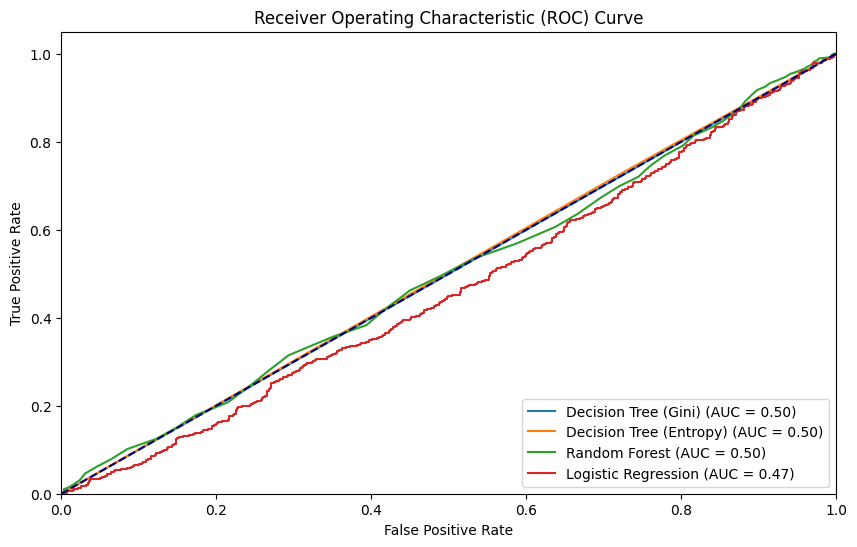

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.exceptions import NotFittedError

models = {
    'Decision Tree (Gini)': dt_gini,
    'Decision Tree (Entropy)': dt_entropy,
    'Random Forest': rf,
    'Logistic Regression': lr
}

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
  try:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
  except NotFittedError:
    print(f"{model_name} is not fitted. Fitting now...")
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Conclusion

Throughout this assignment, we have evaluated the use of 4 classifiers on the mushrooms_new.csv dataset. The 4 approaches we used were the Gini Decision Tree, Entropy Decision Tree, Random Forest, and Logistic Regression.

Our results can be as follows:
*     Gini:
Best Cross-Validation Score: 0.757474654263911
Test Set Accuracy: 0.756357670221493
*     Entropy:
Best Cross-Validation Score: 0.758705810159316
Test Set Accuracy: 0.7579983593109105
*     Random Forest:
Best Cross-Validation Score: 0.7594091069984991
Test Set Accuracy: 0.7592288761279737
*     Logistic Regression:
Best Cross-Validation Score: 0.7592332055033364
Test Set Accuracy: 0.7592288761279737

Through these results, we can observe that Random Forest was the best performing classifier on the mushroom dataset in terms of overall accuracy.

Upon performing 10-cross-fold validation, we again see the result that Random Forest was the superior classifier, while both decision trees performed relatively similar to eachother.

In the case of the T test, we also see comparable results that support our previous conclusion. Between the decision trees, we noticed a t-value of nearly 1 indicating no signifigant difference between the models. However between the decision trees and the Random forest, we observe large t-values which support the Random Forest outperforming both of the decision trees.

After analyzing the ROC Curves, we notice that all of the classifiers are along the diagonal. This means that each classifier were essentially no better than random guessing. This could be an indication of an issue with the data preprocessing or evaluation of the probabilities.

In conclusion, we were able to determine that Random Forest classifier is the best performing on the dataset for mushrooms accross all of our trials and comparisons, which included testing other classifiers like Gini decision trees, entropy decision trees, and logistic regression. We compared the decision trees with the Random Forest classifier using 10 fold cross validation and t tests, which all showed that Random Forests was the best performing.


